In [410]:
#!pip install torch torchvision
#!pip uninstall torch
#!pip install torch --force-reinstall
#!pip install torch --index-url https://download.pytorch.org/whl/cu118

In [425]:
import os
import torch
print("torch module path:", torch.__file__)
print(torch.cuda.is_available())
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, ClassifierMixin



torch module path: c:\Users\Daria\anaconda3\Lib\site-packages\torch\__init__.py
False


In [412]:

data = pd.read_csv('Data/Final_data/final_depr_one_scaled')

data = data.iloc[:, 1:]
data.head()

,821,328813,823,817,818,239935,28116,351091,28118,1161942,...,78344,1692,68274,40091,1393,28133,183,29346,349096,Depression
0,1.439593,-0.405899,-0.592464,-0.294858,-0.629663,-0.388186,0.060858,-0.638728,-0.158473,-0.274041,...,-0.255388,-0.258027,-0.19843,2.305337,-0.153823,-0.106539,-0.177886,-0.184357,-0.063034,0
1,-0.746323,-0.497882,0.149193,-0.318254,-0.611975,-0.337264,-0.599826,0.072958,-0.541310,2.875357,...,-0.255388,-0.258027,-0.19843,-0.209176,-0.153823,-0.106539,-0.177886,-0.184357,-0.077118,1
2,0.491225,0.320783,-0.668681,-0.139988,-0.220985,-0.293335,3.686425,-0.317174,-0.216365,-0.257336,...,-0.255388,-0.258027,-0.19843,-0.209176,-0.153823,-0.106539,-0.177886,0.329359,-0.077118,0
3,0.234604,-0.341134,-0.547374,-0.308704,0.088972,-0.388365,0.077232,1.987442,-0.475624,-0.262770,...,-0.255388,-0.258027,-0.19843,-0.209176,-0.153823,-0.106539,-0.177886,-0.184357,-0.077118,0
4,0.933617,-0.362895,-0.236814,-0.193425,-0.012090,-0.175105,0.195748,-0.186020,0.265365,-0.033088,...,-0.255388,-0.258027,-0.19843,-0.209176,-0.153823,-0.106539,-0.177886,-0.184357,-0.077118,1


In [ ]:
#compare against what?
#start with shallow model
#start with 2 HL
#play around with how many perceptons in HL (gridseach)
#split data x, y
#train test split
#X to float tensor
#y to long tensor
#set criterion/loss function
#set optimizer
#set learning rate
#set number of epochs

#5x cross validation

#google colab
#save model after every 10 epochs
#END find what bacteria have the highest impact


In [ ]:
class Model(nn.Module):
    def __init__(self, input_size, h1, h2, output_size = 2):
        super().__init__()
        self.fc_1 = nn.Linear(input_size, h1)
        self.fc_2 = nn.Linear(h1, h2)
        self.output = nn.Linear(h2, output_size)

    def forward(self, x):
        x= F.relu(self.fc_1(x))
        x= F.relu(self.fc_2(x))
        x= self.output(x)
        return x

In [416]:
X = data.drop('Depression', axis = 1)
y = data['Depression']

X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [417]:
print(X_train)

tensor([[ 1.7167, -0.4124, -0.4068,  ..., -0.1779, -0.1844, -0.0771],
        [-0.8472, -0.5015, -0.6727,  ..., -0.1779, -0.1844, -0.0771],
        [-0.8429, -0.4810, -0.3289,  ..., -0.1779, -0.1844, -0.0771],
        ...,
        [ 2.5006, -0.4884,  0.1661,  ..., -0.1779, -0.1844, -0.0771],
        [-0.8465, -0.5015, -0.2413,  ..., -0.1779, -0.1844, -0.0771],
        [-0.8407, -0.4985, -0.6697,  ..., -0.1779, -0.1844, -0.0771]])


In [ ]:
param_grid = {
    'learning_rate': [0.1, 0.01, 0.005 0.001],
    'perceptrons' : [10.20,30,40],
}
model = Model(input_size = 556, h1 =20, h2 =20)
grid = GridSearchCV(estimator=)

In [ ]:
#torch.manual_seed(10)


In [418]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [419]:
epochs = 130
losses = []

for i in range(epochs):
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)

    losses.append(loss.detach().numpy())

    if i % 10 == 0:
        print(f'Epoch: {i} and loss: {loss}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 and loss: 0.6985182762145996
Epoch: 10 and loss: 0.5614219903945923
Epoch: 20 and loss: 0.4336150288581848
Epoch: 30 and loss: 0.31072330474853516
Epoch: 40 and loss: 0.2052811086177826
Epoch: 50 and loss: 0.12559449672698975
Epoch: 60 and loss: 0.07250615209341049
Epoch: 70 and loss: 0.041454996913671494
Epoch: 80 and loss: 0.024845099076628685
Epoch: 90 and loss: 0.015901712700724602
Epoch: 100 and loss: 0.01088998094201088
Epoch: 110 and loss: 0.007882222533226013
Epoch: 120 and loss: 0.005949660204350948


Text(0.5, 0, 'Epoch')

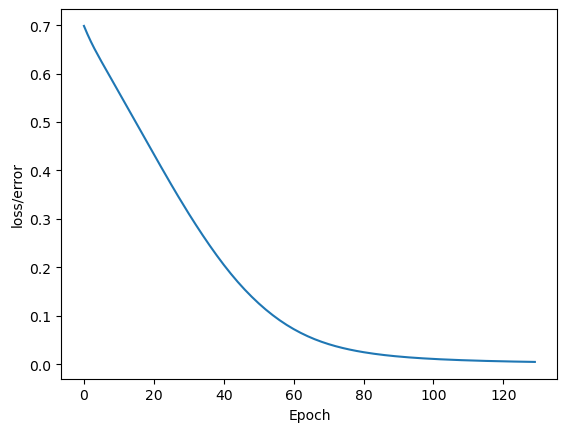

In [420]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')

In [421]:

with torch.no_grad():  
  y_eval = model.forward(X_test) 
  loss = criterion(y_eval, y_test) 

     
loss

tensor(0.2419)

In [422]:
len(X_test)

87

In [423]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    print(f'{i+1}.)  {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'We got {correct} correct!')

1.)  tensor([-7.0664,  6.0163]) 	 1 	 1
2.)  tensor([ 1.1554, -1.3237]) 	 0 	 0
3.)  tensor([ 1.4068, -1.3190]) 	 1 	 0
4.)  tensor([-4.2372,  3.5514]) 	 1 	 1
5.)  tensor([-3.8387,  3.6061]) 	 1 	 1
6.)  tensor([ 2.8100, -2.7294]) 	 0 	 0
7.)  tensor([ 0.0546, -0.1705]) 	 1 	 0
8.)  tensor([ 3.3279, -3.2274]) 	 0 	 0
9.)  tensor([ 0.6184, -0.6533]) 	 1 	 0
10.)  tensor([-2.6717,  2.5402]) 	 1 	 1
11.)  tensor([ 1.6143, -1.0958]) 	 0 	 0
12.)  tensor([ 1.7332, -1.7350]) 	 0 	 0
13.)  tensor([-1.2806,  1.3907]) 	 1 	 1
14.)  tensor([-3.6203,  3.1708]) 	 1 	 1
15.)  tensor([-2.3759,  2.4701]) 	 1 	 1
16.)  tensor([ 3.0920, -2.6351]) 	 0 	 0
17.)  tensor([ 2.0771, -1.9245]) 	 0 	 0
18.)  tensor([ 2.3174, -2.1104]) 	 0 	 0
19.)  tensor([ 0.9777, -0.8870]) 	 1 	 0
20.)  tensor([ 3.1385, -2.8374]) 	 0 	 0
21.)  tensor([ 1.8254, -1.5998]) 	 0 	 0
22.)  tensor([-0.3812,  0.3920]) 	 1 	 1
23.)  tensor([ 3.4231, -3.0464]) 	 0 	 0
24.)  tensor([-0.8712,  0.5837]) 	 1 	 1
25.)  tensor([ 1.2069, -0